# LLHP

In [42]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [145]:
llhp = np.load('/data/justin/retro/recos/upgoing_muon_t0/evt1-llhp.npy')

In [47]:
def max_map(x_bin_edges, y_bin_edges, x, y, data):
    '''
    create a map in 2d given a binning
    every bin will contain the maximal data value
    
    x_bin_edges : 1d array
    y_bin_edges : 1d array
    x : 1d array (n_points)
    y : 1d array (n_points)
    data : 1d array (n_points)
    
    '''
    # array to hold indices
    indices = np.empty((2, len(data)))
    indices[0] =  np.digitize(x, x_bin_edges)
    indices[1] =  np.digitize(y, y_bin_edges)
    
    output_map = np.ones((len(x_bin_edges)-1, len(y_bin_edges)-1)) * np.min(data)
    
    for i in xrange(len(data)):
        idx = tuple(indices[:,i].astype(np.int)-1)
        if idx[0] < 0 or idx[1] < 0 or idx[0] >= len(x_bin_edges) -1 or idx[1] >= len(y_bin_edges) -1:
            # outside binning
            continue
        val = data[i]
        output_map[idx] = max(output_map[idx], val)
    
    return output_map

In [88]:
bin_edges = {}

bin_edges['x'] = np.linspace(-100, 100, 101)
bin_edges['y'] = np.linspace(-100, 100, 101)
bin_edges['z'] = np.linspace(-500, -300, 101)
bin_edges['t'] = np.linspace(-100, 100, 101)
bin_edges['track_azimuth'] = np.linspace(0, 2*np.pi, 101)
bin_edges['track_zenith'] = np.linspace(0, np.pi, 101)
bin_edges['track_energy'] = np.linspace(0, 100, 101)
bin_edges['cascade_energy'] = np.linspace(0, 100, 101)

In [131]:
def plot(x_var, y_var, ax):
    tx_map = max_map(bin_edges[x_var], bin_edges[y_var], llhp[x_var], llhp[y_var],llhp['llh'])
    tx_map = tx_map.T
    X, Y = np.meshgrid(bin_edges[x_var], bin_edges[y_var])
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    pc = ax.pcolormesh(X, Y, tx_map, cmap='Spectral_r', vmin=-400)
    plt.colorbar(pc, ax=ax)
    best = np.where(tx_map==np.max(tx_map))
    ax.scatter(X[best], Y[best],c='w',marker='*')
    ax.set_xlim(bin_edges[x_var][0],bin_edges[x_var][-1])
    ax.set_ylim(bin_edges[y_var][0],bin_edges[y_var][-1])

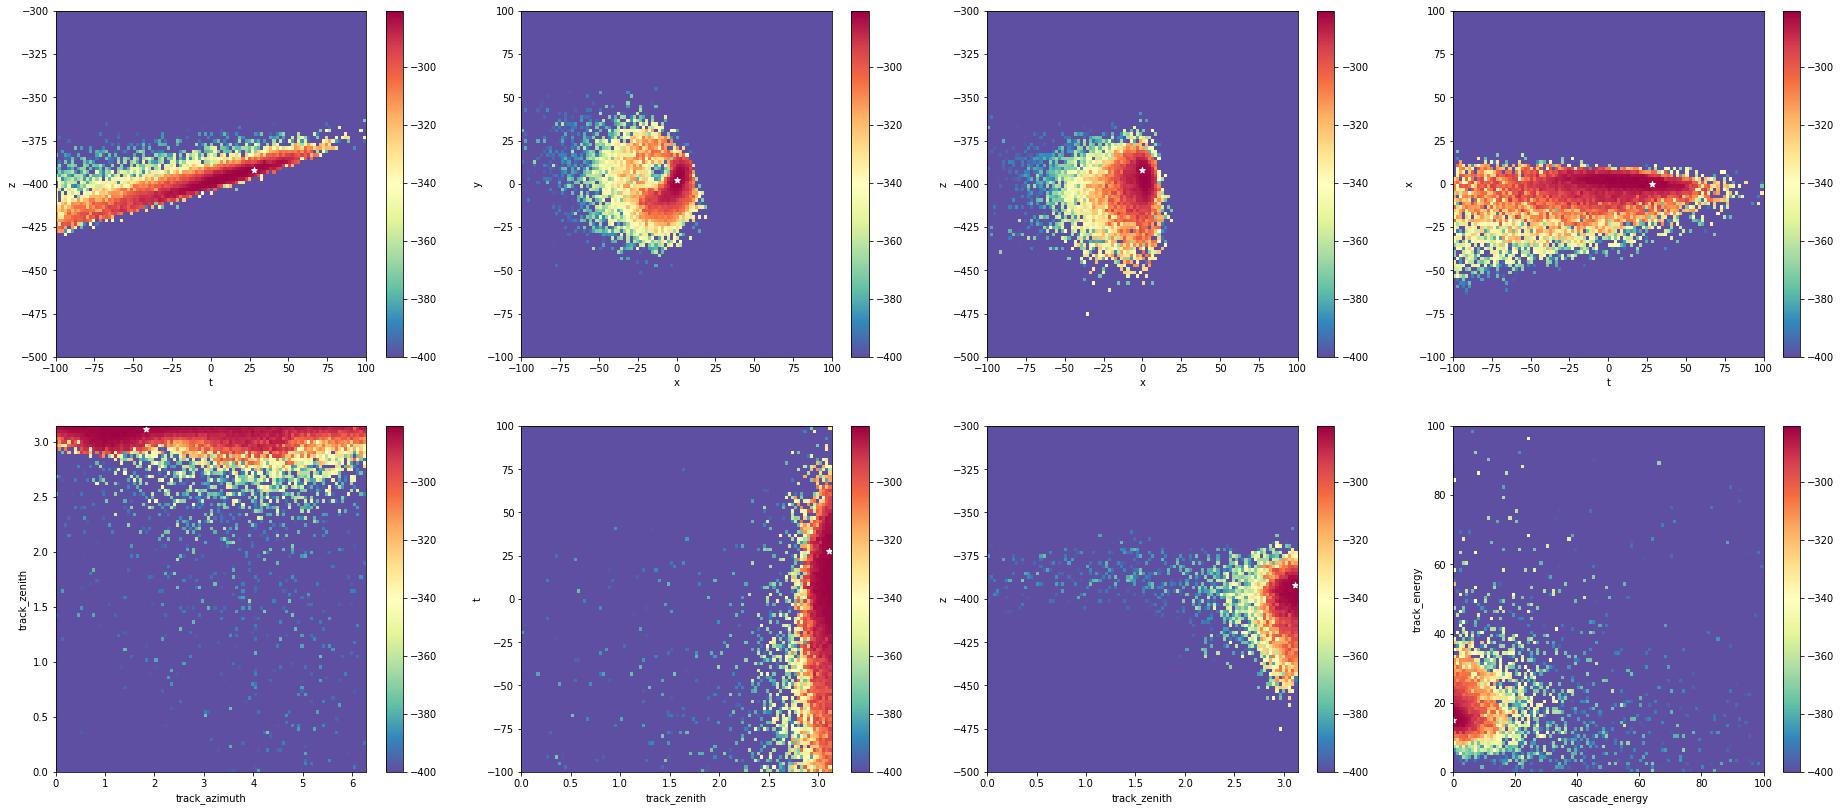

In [146]:
fig, axes = plt.subplots(figsize=(32, 14), ncols=4, nrows=2)
plot('t', 'z', axes[0,0])
plot('x', 'y', axes[0,1])
plot('x', 'z', axes[0,2])
plot('t', 'x', axes[0,3])

plot('track_azimuth', 'track_zenith', axes[1,0])
plot('track_zenith', 't', axes[1,1])
plot('track_zenith', 'z', axes[1,2])
plot('cascade_energy', 'track_energy', axes[1,3])